## NOTE
#### CHECK POITNS GENERATED FORM 800 / _800 EPOCH CODE AND 200 EPOCH CODE USING FINE TUNED MODEL
#### PSEUDO  LABELS GENERATED FORM 800 EPOCH CODE USING THE LABEL GENRATING AND SAVING CODE


# 1

#### loading the model

In [24]:
import torch
import torchvision.models as models

# Define the MoCo v2 model architecture (e.g., ResNet-50)
model = models.resnet50(pretrained=False)  # Set pretrained=False since we are loading custom weights

# Load the pre-trained weights from the .pth file
checkpoint = torch.load(r'C:\Users\Divyank\Desktop\SSL\other\moco_v2_200ep_pretrain.pth', map_location='cpu')

# Load the weights into the model
model.load_state_dict(checkpoint['state_dict'], strict=False)  # Adjust 'state_dict' key as per your .pth file
model.eval()  # Set the model to evaluation mode

c:\Users\Divyank\miniconda3\envs\moco_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Divyank\miniconda3\envs\moco_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\Divyank\AppData\Local\Temp\ipykernel_18952\2107642761.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default val

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

#### loading the data set

In [25]:
import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# Define a custom dataset class for unlabeled data
class UnlabeledDeforestationDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')  # Load image

        if self.transform:
            image = self.transform(image)  # Apply transformations to the image

        return image  # Return only the image (no labels)

# Define transformations (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match the input size of the model
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])

# Define path to image directory
image_dir = r'C:\Users\Divyank\Desktop\SSL\moco\images'

# Load your dataset
dataset = UnlabeledDeforestationDataset(image_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [26]:
import torch.nn as nn

# Replace the final fully connected layer
num_classes = 2  # Change this based on your task (e.g., 2 for binary classification)
model.fc = nn.Linear(model.fc.in_features, num_classes)

## CODE TO GENERAGTE AND SAVE LABELS

Epoch [1/25], Loss: 1.4341


Epoch [2/25], Loss: 0.9231


Epoch [3/25], Loss: 1.0800


Epoch [4/25], Loss: 0.7433


Epoch [5/25], Loss: 0.9511


Epoch [6/25], Loss: 0.4352


Epoch [7/25], Loss: 0.3751


Epoch [8/25], Loss: 0.6037


Epoch [9/25], Loss: 0.2397


Epoch [10/25], Loss: 0.1205


Epoch [11/25], Loss: 0.1950


Epoch [12/25], Loss: 0.3381


Epoch [13/25], Loss: 0.0430


Epoch [14/25], Loss: 0.6927


Epoch [15/25], Loss: 0.2177


Epoch [16/25], Loss: 0.2735


Epoch [17/25], Loss: 0.2380


Epoch [18/25], Loss: 0.3643


Epoch [19/25], Loss: 0.5684


Epoch [20/25], Loss: 0.0670


Epoch [21/25], Loss: 0.2383


Epoch [22/25], Loss: 0.2758


Epoch [23/25], Loss: 0.5515


Epoch [24/25], Loss: 0.2272


Epoch [25/25], Loss: 0.2079


c:\Users\Divyank\miniconda3\envs\moco_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Pseudo-labels saved to 'pseudo_labels.npy'
Pseudo-labels with image paths saved to 'pseudo_labels_with_paths.csv'


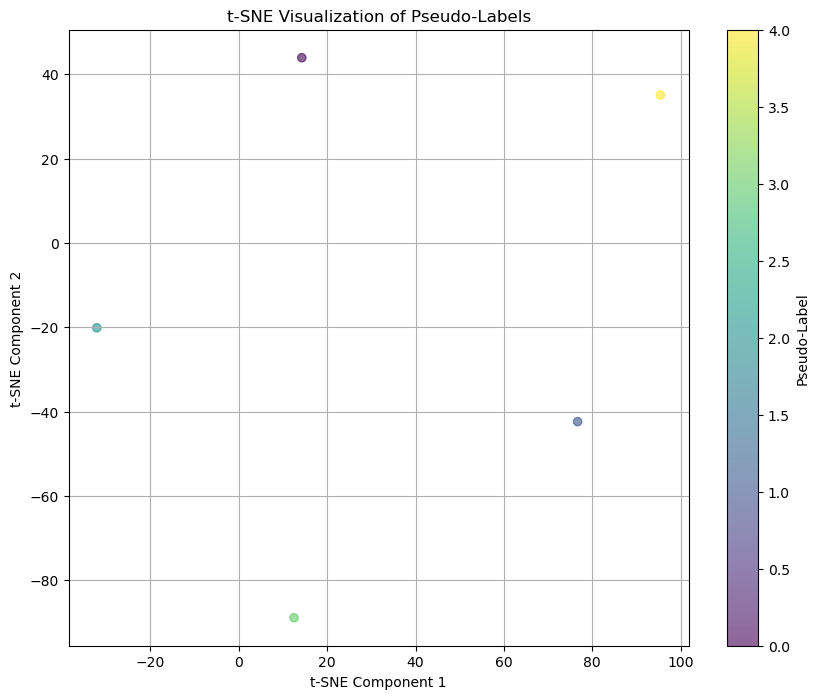

In [27]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Define a custom dataset class for unlabeled data
class UnlabeledDeforestationDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')  # Load image

        if self.transform:
            image = self.transform(image)  # Apply transformations to the image

        return image  # Return only the image (no labels)

# Define transformations (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Randomly crop and resize
    transforms.RandomHorizontalFlip(),  # Randomly flip horizontally
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),  # Random color jitter
    transforms.ToTensor(),  # Convert images to PyTorch tensors (must be the last step)
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])

# Define path to image directory
image_dir = r'C:\Users\Divyank\Desktop\SSL\moco\images'

# Load your dataset
dataset = UnlabeledDeforestationDataset(image_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define a contrastive loss function (e.g., for MoCo v2)
class ContrastiveLoss(nn.Module):
    def __init__(self, temperature=0.07):
        super(ContrastiveLoss, self).__init__()
        self.temperature = temperature

    def forward(self, features_q, features_k):
        # Normalize features
        features_q = nn.functional.normalize(features_q, dim=1)
        features_k = nn.functional.normalize(features_k, dim=1)

        # Compute logits
        logits = torch.matmul(features_q, features_k.T) / self.temperature
        labels = torch.arange(logits.shape[0], device=features_q.device)
        loss = nn.functional.cross_entropy(logits, labels)
        return loss

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with progress bar
num_epochs = 25
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Initialize the contrastive loss
contrastive_loss = ContrastiveLoss()

# List to store the average loss per epoch
epoch_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Wrap the dataloader with tqdm for a progress bar
    progress_bar = tqdm(dataloader, desc=f'Epoch [{epoch+1}/{num_epochs}]', leave=False)

    for images in progress_bar:  # No labels needed for self-supervised learning
        images = images.to(device)

        # Generate two views of the same image (e.g., using augmentations)
        images_q = images  # Query view (already transformed)
        images_k = images  # Key view (already transformed)

        # Forward pass
        features_q = model(images_q)
        features_k = model(images_k)

        # Compute contrastive loss
        loss = contrastive_loss(features_q, features_k)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Update the progress bar description with the current loss
        progress_bar.set_postfix(loss=loss.item())

    # Calculate the average loss for the epoch
    epoch_avg_loss = running_loss / len(dataloader)
    epoch_losses.append(epoch_avg_loss)  # Store the average loss for this epoch

    # Print the average loss for the epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_avg_loss:.4f}')

# ============================================================
# Step 1: Extract features from the trained model
# ============================================================
def extract_features(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    features = []
    with torch.no_grad():
        for images in dataloader:
            images = images.to(device)
            outputs = model(images)  # Extract features
            features.append(outputs.cpu().numpy())
    return np.concatenate(features, axis=0)

# Extract features
features = extract_features(model, dataloader, device)

# ============================================================
# Step 2: Generate pseudo-labels using KMeans clustering
# ============================================================
num_clusters = 5  # Adjust the number of clusters based on your task
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
pseudo_labels = kmeans.fit_predict(features)

# ============================================================
# Step 3: Save pseudo-labels to a file
# ============================================================
# Save pseudo-labels as a NumPy array
np.save('pseudo_labels.npy', pseudo_labels)
print("Pseudo-labels saved to 'pseudo_labels.npy'")

# Save pseudo-labels with image paths for reference
image_paths = dataset.image_paths
with open('pseudo_labels_with_paths.csv', 'w') as f:
    f.write("image_path,pseudo_label\n")
    for path, label in zip(image_paths, pseudo_labels):
        f.write(f"{path},{label}\n")
print("Pseudo-labels with image paths saved to 'pseudo_labels_with_paths.csv'")

# ============================================================
# Step 4: Visualize the clusters using t-SNE (optional)
# ============================================================
tsne = TSNE(n_components=2, perplexity=min(30, len(features) - 1), random_state=42)
features_2d = tsne.fit_transform(features)

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=pseudo_labels, cmap='viridis', alpha=0.6)
plt.title('t-SNE Visualization of Pseudo-Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Pseudo-Label')
plt.grid(True)
plt.show()

#### commplete code with next step

In [28]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Define a custom dataset class for unlabeled data
class UnlabeledDeforestationDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')  # Load image

        if self.transform:
            image = self.transform(image)  # Apply transformations to the image

        return image  # Return only the image (no labels)

# Define transformations (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Randomly crop and resize
    transforms.RandomHorizontalFlip(),  # Randomly flip horizontally
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),  # Random color jitter
    transforms.ToTensor(),  # Convert images to PyTorch tensors (must be the last step)
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])

# Define path to image directory
image_dir = r'C:\Users\Divyank\Desktop\SSL\moco\images'

# Load your dataset
dataset = UnlabeledDeforestationDataset(image_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define the model architecture (e.g., ResNet-50)
model = models.resnet50(pretrained=False)  # Set pretrained=False since we are loading custom weights

# Load the pre-trained MoCo v2 weights
checkpoint = torch.load(r'C:\Users\Divyank\Desktop\SSL\other\moco_v2_800ep_pretrain.pth', map_location='cpu')
model.load_state_dict(checkpoint['state_dict'], strict=False)  # Adjust 'state_dict' key as per your .pth file

# Move the model to the appropriate device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define a contrastive loss function (e.g., for MoCo v2)
class ContrastiveLoss(nn.Module):
    def __init__(self, temperature=0.07):
        super(ContrastiveLoss, self).__init__()
        self.temperature = temperature

    def forward(self, features_q, features_k):
        # Normalize features
        features_q = nn.functional.normalize(features_q, dim=1)
        features_k = nn.functional.normalize(features_k, dim=1)

        # Compute logits
        logits = torch.matmul(features_q, features_k.T) / self.temperature
        labels = torch.arange(logits.shape[0], device=features_q.device)
        loss = nn.functional.cross_entropy(logits, labels)
        return loss

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with progress bar
num_epochs = 25
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Initialize the contrastive loss
contrastive_loss = ContrastiveLoss()

# List to store the average loss per epoch
epoch_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Wrap the dataloader with tqdm for a progress bar
    progress_bar = tqdm(dataloader, desc=f'Epoch [{epoch+1}/{num_epochs}]', leave=False)

    for images in progress_bar:  # No labels needed for self-supervised learning
        images = images.to(device)

        # Generate two views of the same image (e.g., using augmentations)
        images_q = images  # Query view (already transformed)
        images_k = images  # Key view (already transformed)

        # Forward pass
        features_q = model(images_q)
        features_k = model(images_k)

        # Compute contrastive loss
        loss = contrastive_loss(features_q, features_k)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Update the progress bar description with the current loss
        progress_bar.set_postfix(loss=loss.item())

    # Calculate the average loss for the epoch
    epoch_avg_loss = running_loss / len(dataloader)
    epoch_losses.append(epoch_avg_loss)  # Store the average loss for this epoch

    # Print the average loss for the epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_avg_loss:.4f}')

# ============================================================
# Step 1: Extract features from the trained model
# ============================================================
def extract_features(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    features = []
    with torch.no_grad():
        for images in dataloader:
            images = images.to(device)
            outputs = model(images)  # Extract features
            features.append(outputs.cpu().numpy())
    return np.concatenate(features, axis=0)

# Extract features
features = extract_features(model, dataloader, device)

# ============================================================
# Step 2: Generate pseudo-labels using KMeans clustering
# ============================================================
num_clusters = 5  # Adjust the number of clusters based on your task
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
pseudo_labels = kmeans.fit_predict(features)

# ============================================================
# Step 3: Train a supervised model using pseudo-labels
# ============================================================
# Define a supervised classification model
class DeforestationClassifier(nn.Module):
    def __init__(self, backbone, num_classes):
        super(DeforestationClassifier, self).__init__()
        self.backbone = backbone  # SSL model (e.g., MoCo v2)
        # Replace the final fully connected layer of the backbone
        self.backbone.fc = nn.Linear(self.backbone.fc.in_features, num_classes)

    def forward(self, x):
        return self.backbone(x)  # Pass through the backbone and classification head

# Initialize the supervised model
num_classes = num_clusters  # Number of clusters = number of classes
classifier = DeforestationClassifier(model, num_classes)
classifier.to(device)

# Define a supervised loss function
criterion = nn.CrossEntropyLoss()  # For classification
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

# Create a labeled dataset using pseudo-labels
class LabeledDeforestationDataset(Dataset):
    def __init__(self, image_dir, pseudo_labels, transform=None):
        self.image_dir = image_dir
        self.image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
        self.pseudo_labels = pseudo_labels  # Pseudo-labels from SSL
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')  # Load image

        if self.transform:
            image = self.transform(image)  # Apply transformations to the image

        label = self.pseudo_labels[idx]  # Get the pseudo-label
        return image, label  # Return both image and pseudo-label

labeled_dataset = LabeledDeforestationDataset(image_dir, pseudo_labels, transform=transform)
labeled_dataloader = DataLoader(labeled_dataset, batch_size=32, shuffle=True)

# Training loop for the supervised model
num_epochs_supervised = 25  # Adjust based on your needs
for epoch in range(num_epochs_supervised):
    classifier.train()  # Set the model to training mode
    running_loss = 0.0

    # Wrap the dataloader with tqdm for a progress bar
    progress_bar = tqdm(labeled_dataloader, desc=f'Epoch [{epoch+1}/{num_epochs_supervised}]', leave=False)

    for images, labels in progress_bar:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = classifier(images)
        labels = labels.long()  # Ensure labels are int64
        loss = criterion(outputs, labels)


        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Update the progress bar description with the current loss
        progress_bar.set_postfix(loss=loss.item())

    # Calculate the average loss for the epoch
    epoch_avg_loss = running_loss / len(labeled_dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs_supervised}], Loss: {epoch_avg_loss:.4f}')

# ============================================================
# Step 4: Evaluate the supervised model (optional)
# ============================================================
classifier.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for images, labels in labeled_dataloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = classifier(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the training set: {accuracy:.2f}%')

c:\Users\Divyank\miniconda3\envs\moco_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Divyank\miniconda3\envs\moco_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\Divyank\AppData\Local\Temp\ipykernel_18952\563423865.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default val

Epoch [1/25], Loss: 0.8972


Epoch [2/25], Loss: 0.6759


Epoch [3/25], Loss: 0.6939


Epoch [4/25], Loss: 0.7962


Epoch [5/25], Loss: 0.3973


Epoch [6/25], Loss: 0.3075


Epoch [7/25], Loss: 0.4454


Epoch [8/25], Loss: 0.2940


Epoch [9/25], Loss: 0.4017


Epoch [10/25], Loss: 0.2455


Epoch [11/25], Loss: 0.0669


Epoch [12/25], Loss: 0.2187


Epoch [13/25], Loss: 0.3122


Epoch [14/25], Loss: 0.2769


Epoch [15/25], Loss: 0.2712


Epoch [16/25], Loss: 0.2271


Epoch [17/25], Loss: 0.3320


Epoch [18/25], Loss: 0.4647


Epoch [19/25], Loss: 0.2919


Epoch [20/25], Loss: 0.3132


Epoch [21/25], Loss: 0.3574


Epoch [22/25], Loss: 0.0750


Epoch [23/25], Loss: 0.2349


Epoch [24/25], Loss: 0.2806


Epoch [25/25], Loss: 0.2790


c:\Users\Divyank\miniconda3\envs\moco_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Epoch [1/25], Loss: 1.7884


Epoch [2/25], Loss: 3.0520


Epoch [3/25], Loss: 5.5462


Epoch [4/25], Loss: 1.3865


Epoch [5/25], Loss: 3.1486


Epoch [6/25], Loss: 1.3569


Epoch [7/25], Loss: 2.2270


Epoch [8/25], Loss: 1.0517


Epoch [9/25], Loss: 1.0171


Epoch [10/25], Loss: 1.8626


Epoch [11/25], Loss: 1.7916


Epoch [12/25], Loss: 0.8586


Epoch [13/25], Loss: 1.0171


Epoch [14/25], Loss: 1.6594


Epoch [15/25], Loss: 1.2712


Epoch [16/25], Loss: 1.0332


Epoch [17/25], Loss: 0.9347


Epoch [18/25], Loss: 0.6690


Epoch [19/25], Loss: 0.8946


Epoch [20/25], Loss: 1.0904


Epoch [21/25], Loss: 1.2339


Epoch [22/25], Loss: 1.0866


Epoch [23/25], Loss: 0.5950


Epoch [24/25], Loss: 0.6613


Epoch [25/25], Loss: 1.0186
Accuracy of the model on the training set: 40.00%


# same code with evaluation and plots

In [29]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE  # For feature visualization
from sklearn.cluster import KMeans  # For clustering

# Define a custom dataset class for unlabeled data
class UnlabeledDeforestationDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')  # Load image

        if self.transform:
            image = self.transform(image)  # Apply transformations to the image

        return image  # Return only the image (no labels)

# Define transformations (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Randomly crop and resize
    transforms.RandomHorizontalFlip(),  # Randomly flip horizontally
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),  # Random color jitter
    transforms.ToTensor(),  # Convert images to PyTorch tensors (must be the last step)
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])

# Define path to image directory
image_dir = r'C:\Users\Divyank\Desktop\SSL\moco\images'

# Load your dataset
dataset = UnlabeledDeforestationDataset(image_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define a contrastive loss function (e.g., for MoCo v2)
class ContrastiveLoss(nn.Module):
    def __init__(self, temperature=0.07):
        super(ContrastiveLoss, self).__init__()
        self.temperature = temperature

    def forward(self, features_q, features_k):
        # Normalize features
        features_q = nn.functional.normalize(features_q, dim=1)
        features_k = nn.functional.normalize(features_k, dim=1)

        # Compute logits
        logits = torch.matmul(features_q, features_k.T) / self.temperature
        labels = torch.arange(logits.shape[0], device=features_q.device)
        loss = nn.functional.cross_entropy(logits, labels)
        return loss

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with progress bar
num_epochs = 25
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Initialize the contrastive loss
contrastive_loss = ContrastiveLoss()

# List to store the average loss per epoch
epoch_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Wrap the dataloader with tqdm for a progress bar
    progress_bar = tqdm(dataloader, desc=f'Epoch [{epoch+1}/{num_epochs}]', leave=False)

    for images in progress_bar:  # No labels needed for self-supervised learning
        images = images.to(device)

        # Generate two views of the same image (e.g., using augmentations)
        images_q = images  # Query view (already transformed)
        images_k = images  # Key view (already transformed)

        # Forward pass
        features_q = model(images_q)
        features_k = model(images_k)

        # Compute contrastive loss
        loss = contrastive_loss(features_q, features_k)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Update the progress bar description with the current loss
        progress_bar.set_postfix(loss=loss.item())

    # Calculate the average loss for the epoch
    epoch_avg_loss = running_loss / len(dataloader)
    epoch_losses.append(epoch_avg_loss)  # Store the average loss for this epoch

    # Print the average loss for the epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_avg_loss:.4f}')



###########################################################################################################################




Epoch [1/25], Loss: 0.3303


Epoch [2/25], Loss: 0.0595


Epoch [3/25], Loss: 0.0289


Epoch [4/25], Loss: 0.1854


Epoch [5/25], Loss: 0.5666


Epoch [6/25], Loss: 0.3902


Epoch [7/25], Loss: 0.1281


Epoch [8/25], Loss: 0.2814


Epoch [9/25], Loss: 0.3134


Epoch [10/25], Loss: 0.2180


Epoch [11/25], Loss: 0.1143


Epoch [12/25], Loss: 0.1446


Epoch [13/25], Loss: 0.1758


Epoch [14/25], Loss: 0.1335


Epoch [15/25], Loss: 0.0077


Epoch [16/25], Loss: 0.2523


Epoch [17/25], Loss: 0.0831


Epoch [18/25], Loss: 0.0364


Epoch [19/25], Loss: 0.2194


Epoch [20/25], Loss: 0.0750


Epoch [21/25], Loss: 0.0152


Epoch [22/25], Loss: 0.0406


Epoch [23/25], Loss: 0.0178


Epoch [24/25], Loss: 0.0034


Epoch [25/25], Loss: 0.0005


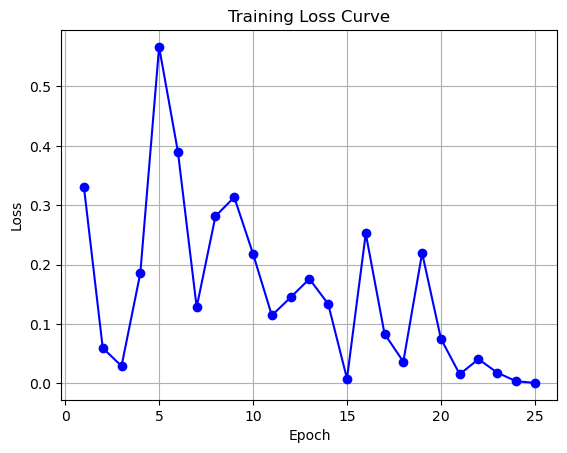

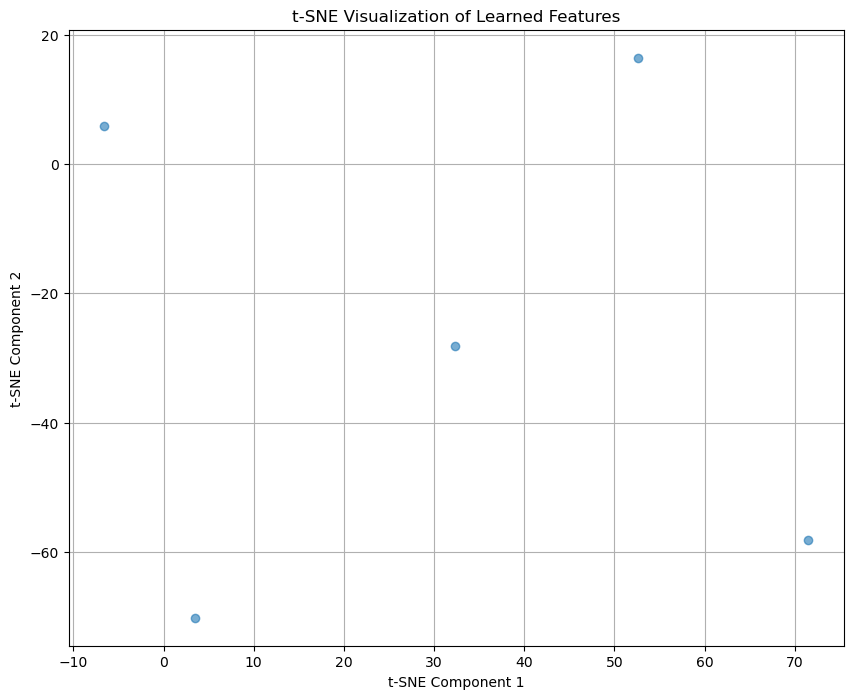

c:\Users\Divyank\miniconda3\envs\moco_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


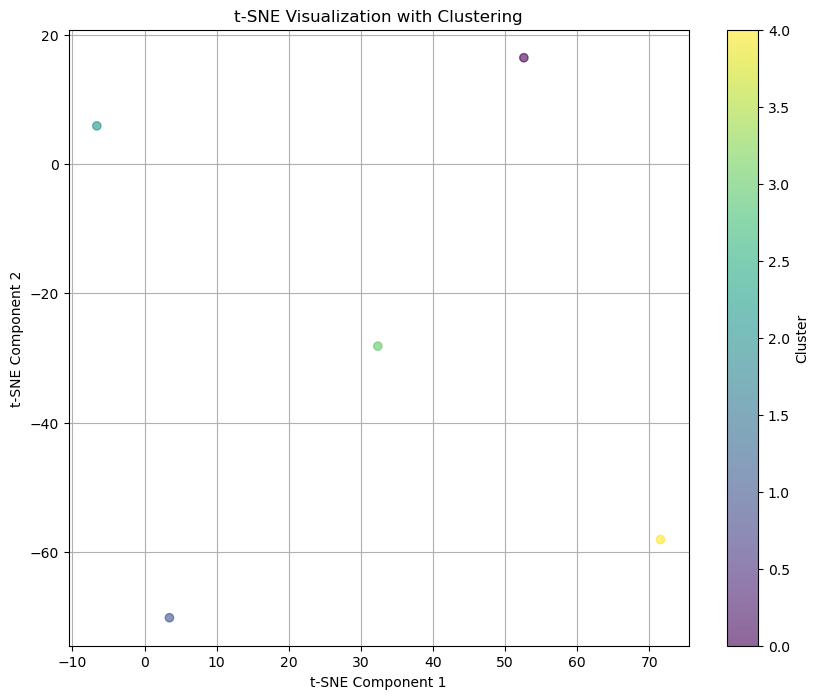

In [30]:
# Plot the loss curve
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()

# Evaluation: Feature Extraction and Visualization
def extract_features(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    features = []
    with torch.no_grad():
        for images in dataloader:
            images = images.to(device)
            outputs = model(images)  # Extract features
            features.append(outputs.cpu().numpy())
    return np.concatenate(features, axis=0)

# Extract features from the trained model
features = extract_features(model, dataloader, device)

# Dimensionality Reduction using t-SNE
tsne = TSNE(n_components=2, perplexity=min(30, len(features) - 1), random_state=42)
features_2d = tsne.fit_transform(features)

# Plot t-SNE visualization
plt.figure(figsize=(10, 8))
plt.scatter(features_2d[:, 0], features_2d[:, 1], alpha=0.6)
plt.title('t-SNE Visualization of Learned Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

# Clustering using KMeans
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
cluster_labels = kmeans.fit_predict(features)

# Plot t-SNE with cluster labels
plt.figure(figsize=(10, 8))
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.title('t-SNE Visualization with Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Display a grid of sample images
def show_image_grid(dataloader, num_images=16):
    images = next(iter(dataloader))[:num_images]  # Get a batch of images
    images = images.cpu()  # Move images to CPU for visualization

    # Reverse normalization for visualization
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    images = images * std + mean  # Reverse normalization
    images = images.clamp(0, 1)  # Clamp values to [0, 1]

    # Plot the images in a grid
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].permute(1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
        plt.axis('off')
    plt.suptitle('Sample Images from Dataset')
    plt.show()


# fine- tuned and plots

c:\Users\Divyank\miniconda3\envs\moco_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Divyank\miniconda3\envs\moco_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\Divyank\AppData\Local\Temp\ipykernel_18952\550281039.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default val

Epoch [1/25], Loss: 0.9774


Epoch [2/25], Loss: 0.8683


Epoch [3/25], Loss: 1.0246


Epoch [4/25], Loss: 0.8953


Epoch [5/25], Loss: 0.9221


Epoch [6/25], Loss: 0.8975


Epoch [7/25], Loss: 1.0146


Epoch [8/25], Loss: 0.9347


Epoch [9/25], Loss: 1.1301


Epoch [10/25], Loss: 0.9363


Epoch [11/25], Loss: 0.8941


Epoch [12/25], Loss: 0.8612


Epoch [13/25], Loss: 0.8904


Epoch [14/25], Loss: 0.8672


Epoch [15/25], Loss: 1.0712


Epoch [16/25], Loss: 0.9447


Epoch [17/25], Loss: 0.9770


Epoch [18/25], Loss: 1.0449


Epoch [19/25], Loss: 1.0490


Epoch [20/25], Loss: 0.9393


Epoch [21/25], Loss: 0.9714


Epoch [22/25], Loss: 0.8322


Epoch [23/25], Loss: 0.9388


Epoch [24/25], Loss: 1.0038


Epoch [25/25], Loss: 0.8942


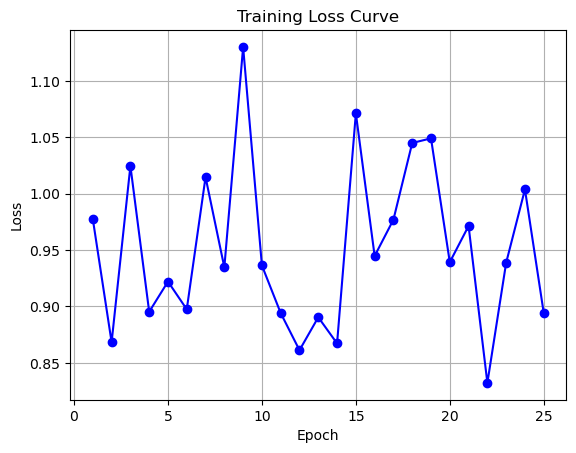

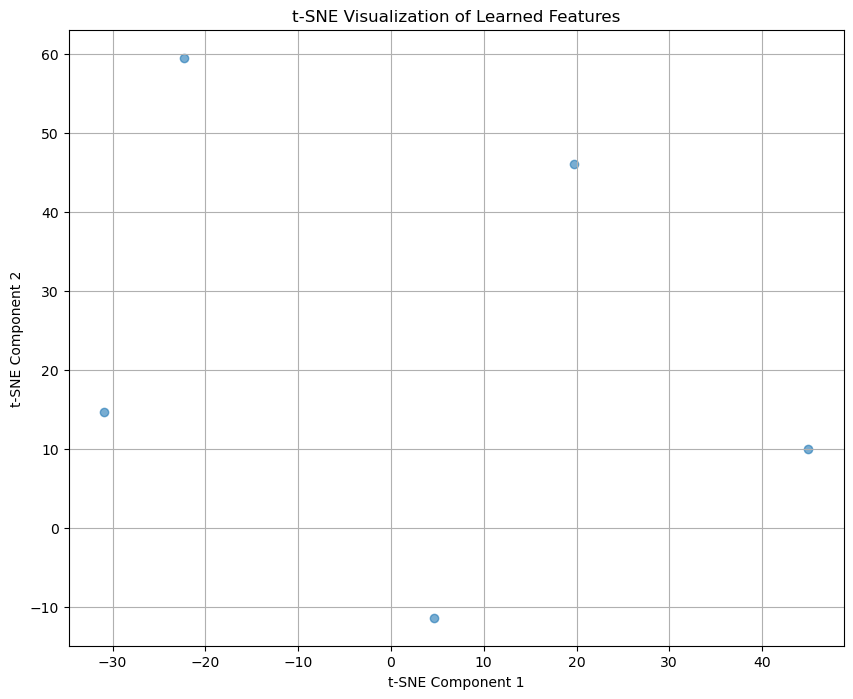

In [31]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

# Define a custom dataset class for unlabeled data
class UnlabeledDeforestationDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')  # Load image

        if self.transform:
            image = self.transform(image)  # Apply transformations to the image

        return image  # Return only the image (no labels)

# Define transformations (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Randomly crop and resize
    transforms.RandomHorizontalFlip(),  # Randomly flip horizontally
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),  # Random color jitter
    transforms.ToTensor(),  # Convert images to PyTorch tensors (must be the last step)
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])

# Define path to image directory
image_dir = r'C:\Users\Divyank\Desktop\SSL\moco\images'

# Load your dataset
dataset = UnlabeledDeforestationDataset(image_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=0, pin_memory=True)

# Define the Projection Head
class ProjectionHead(nn.Module):
    def __init__(self, input_dim=2048, hidden_dim=2048, output_dim=128):
        super(ProjectionHead, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),  # Fully connected layer
            nn.ReLU(),  # Activation function
            nn.Linear(hidden_dim, output_dim),  # Output layer
        )

    def forward(self, x):
        return self.fc(x)

# Load the pre-trained MoCo v2 model
model = models.resnet50(pretrained=False)  # Use the same architecture as MoCo v2
checkpoint = torch.load(r'C:\Users\Divyank\Desktop\SSL\other\moco_v2_800ep_pretrain.pth', map_location='cpu')
model.load_state_dict(checkpoint['state_dict'], strict=False)

# Add the projection head to the model
model.fc = ProjectionHead(input_dim=2048, hidden_dim=2048, output_dim=128)
model.to(device)

# Define a contrastive loss function (e.g., for MoCo v2)
class ContrastiveLoss(nn.Module):
    def __init__(self, temperature=0.07):
        super(ContrastiveLoss, self).__init__()
        self.temperature = temperature

    def forward(self, features_q, features_k):
        # Normalize features
        features_q = nn.functional.normalize(features_q, dim=1)
        features_k = nn.functional.normalize(features_k, dim=1)

        # Compute logits
        logits = torch.matmul(features_q, features_k.T) / self.temperature
        labels = torch.arange(logits.shape[0], device=features_q.device)
        loss = nn.functional.cross_entropy(logits, labels)
        return loss

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with progress bar
num_epochs = 25
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Initialize the contrastive loss
contrastive_loss = ContrastiveLoss()

# Mixed precision training
scaler = torch.cuda.amp.GradScaler()

# List to store the average loss per epoch
epoch_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Wrap the dataloader with tqdm for a progress bar
    progress_bar = tqdm(dataloader, desc=f'Epoch [{epoch+1}/{num_epochs}]', leave=False)

    for images in progress_bar:  # No labels needed for self-supervised learning
        images = images.to(device)

        # Generate two views of the same image (e.g., using augmentations)
        images_q = images  # Query view (already transformed)
        images_k = images  # Key view (already transformed)

        # Forward pass
        with torch.cuda.amp.autocast():
            features_q = model(images_q)
            features_k = model(images_k)
            loss = contrastive_loss(features_q, features_k)

        # Backward pass and optimize
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()

        # Update the progress bar description with the current loss
        progress_bar.set_postfix(loss=loss.item())

    # Calculate the average loss for the epoch
    epoch_avg_loss = running_loss / len(dataloader)
    epoch_losses.append(epoch_avg_loss)  # Store the average loss for this epoch

    # Print the average loss for the epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_avg_loss:.4f}')

    # Save checkpoint every 5 epochs
    if (epoch + 1) % 5 == 0:
        checkpoint = {
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': epoch_avg_loss,
        }
        torch.save(checkpoint, f'checkpoint_epoch_{epoch+1}_800.pth')

# Plot the loss curve
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()

# Extract features and visualize using t-SNE
def extract_features(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    features = []
    with torch.no_grad():
        for images in dataloader:
            images = images.to(device)
            outputs = model(images)  # Extract features
            features.append(outputs.cpu().numpy())
    return np.concatenate(features, axis=0)

features = extract_features(model, dataloader, device)
tsne = TSNE(n_components=2, perplexity=min(30, len(features) - 1), random_state=42)
features_2d = tsne.fit_transform(features)

# Plot t-SNE visualization
plt.figure(figsize=(10, 8))
plt.scatter(features_2d[:, 0], features_2d[:, 1], alpha=0.6)
plt.title('t-SNE Visualization of Learned Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

## Updated Training Loop with Early Stopping
Here’s an example of a training loop with early stopping and learning rate scheduling:

    Key Takeaways:
        Start Small: Begin with 10–20 epochs and increase if necessary.

        Use Early Stopping: Prevents overfitting and saves the best model.

        Monitor Loss Curves: Plot training and validation loss to identify issues.

        Adjust Learning Rate: Use a learning rate scheduler to fine-tune the learning rate dynamically.



In [19]:
# Training loop with early stopping
best_loss = float('inf')
patience = 5
no_improvement = 0

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Training loop
    progress_bar = tqdm(train_dataloader, desc=f'Epoch [{epoch+1}/{num_epochs}]', leave=False)
    for images in progress_bar:
        images = images.to(device)

        # Generate two views of the same image (e.g., using augmentations)
        images_q = images  # Query view (already transformed)
        images_k = images  # Key view (already transformed)

        # Forward pass
        with torch.cuda.amp.autocast():
            features_q = model(images_q)
            features_k = model(images_k)
            loss = contrastive_loss(features_q, features_k)

        # Backward pass and optimize
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    # Calculate the average training loss for the epoch
    epoch_avg_loss = running_loss / len(train_dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_avg_loss:.4f}')

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for images in val_dataloader:
            images = images.to(device)
            features_q = model(images)
            features_k = model(images)
            loss = contrastive_loss(features_q, features_k)
            val_loss += loss.item()

    # Calculate the average validation loss for the epoch
    val_avg_loss = val_loss / len(val_dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_avg_loss:.4f}')

    # Update learning rate based on validation loss
    scheduler.step(val_avg_loss)

    # Early stopping
    if val_avg_loss < best_loss:
        best_loss = val_avg_loss
        no_improvement = 0
        torch.save(model.state_dict(), 'best_model.pth')  # Save the best model
    else:
        no_improvement += 1

    if no_improvement >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

NameError: name 'train_dataloader' is not defined